                                 Portfolio Optimisation

                                     Safwan Ahmed
                                     ID - 0682304

In [1]:
"""Generated a portfolio of randomly selected stocks from a user. Carried out correlation, covariance and 
normalisation of stock prices over the last 12 year period. Generated a portfolio with 10000 randomly drawn weights 
and selected the weights with the highest Sharpe ratio. 
A Monte Carlo simulation was also carried out to generate an estimate of portfolio value at the end of 1 year"""

#Importing the various libraries that will help in constructing this project  

import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
from datetime import datetime
import random

import matplotlib.pyplot as plt
%matplotlib inline 

from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [2]:
#Research time period of 12 years from 2008 to 2019

start = pd.to_datetime('2008-01-01')
end = pd.to_datetime('2019-12-31')      

The next code will ask the user about the number of stocks that it wants in the portfolio.

The user would then have to input the 'tickr' of the stocks interested in.

Example - Apple = AAPL, 
Microsoft = MSFT,
Netflix = NFLX,
P&G = PG,
Goldman Sachs = GS,
Bank of America = BAC

In [3]:
"""A question will be prompted to the user to input the number of stocks they want in their portfolio and input the 
tickr symbol of the stocks"""

num_of_stocks = int(input("How many stocks do you want in portfolio? "))
print('\n')
stocks = []
for x in range(num_of_stocks):
    stocks.append(input("Input tickr of the company: "))
stocks

How many stocks do you want in portfolio? 3


Input tickr of the company: AAPL
Input tickr of the company: MSFT
Input tickr of the company: NFLX


['AAPL', 'MSFT', 'NFLX']

In [4]:
#This code will extract the Adjusted Closing price of the selected stocks from Yahoo finance
#and present it to 2 decimal places
for i in (0,len(stocks)):
    price = wb.DataReader(stocks, data_source = 'yahoo', start = start, end = end)['Adj Close']
    price = round(pd.concat([price], axis = 1),2)
price

Symbols,AAPL,MSFT,NFLX
Date,,,
2008-01-02,6.00,26.32,3.76
2008-01-03,6.01,26.43,3.72
2008-01-04,5.55,25.69,3.52
2008-01-07,5.47,25.86,3.55
2008-01-08,5.28,24.99,3.33
...,...,...,...
2019-12-24,70.46,155.73,333.20
2019-12-26,71.86,157.01,332.63
2019-12-27,71.83,157.29,329.09


In [5]:
#This function shows the correlation matrix among the selected stocks. 
#High correlation indicates similar movement patterns

def correlation():
    for i in (0,len(stocks)):
        
        return price.pct_change(1).corr()
correlation()

Symbols,AAPL,MSFT,NFLX
Symbols,,,
AAPL,1.000000,0.498553,0.272259
MSFT,0.498553,1.000000,0.294894
NFLX,0.272259,0.294894,1.000000


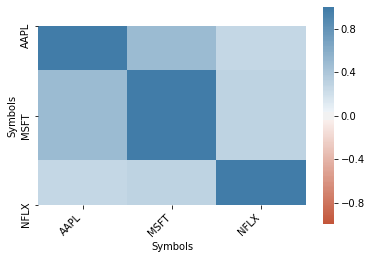

In [6]:
"""Plotting a heatmap of the correlation matrix among the selected stocks to visually 
 illustrate the strength of the correlation"""

corr = price.pct_change(1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 240, n= 300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
#Logarithmic returns is a better way of presenting daily stock returns
log_ret = np.log(price / price.shift(1))
log_ret.head()

Symbols,AAPL,MSFT,NFLX
Date,,,
2008-01-02,NaN,NaN,NaN
2008-01-03,0.001665,0.004171,-0.010695
2008-01-04,-0.079627,-0.028398,-0.055263
2008-01-07,-0.014519,0.006596,0.008487
2008-01-08,-0.035353,-0.034222,-0.063975


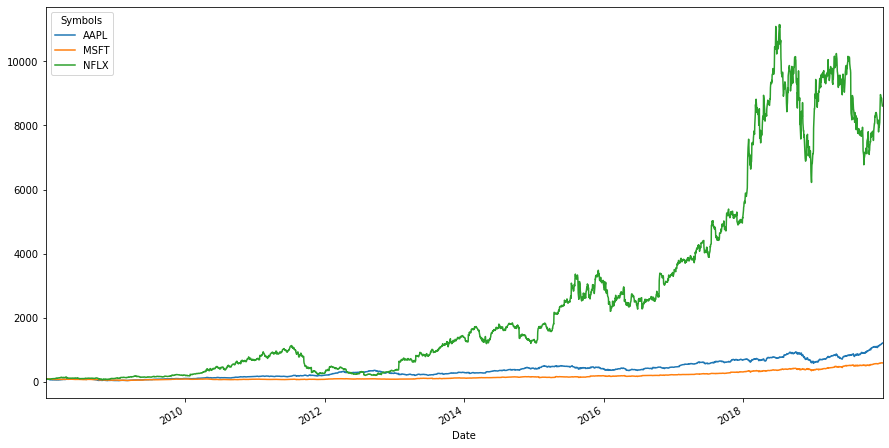

In [8]:
#Normalising the share prices to 100 to show the increase in share price over the 12 year period. 
#Normalising helps us to put the price into perspective with other companies

(price/price.iloc[0] * 100).plot(figsize = (15,8));
plt.show()

In [9]:
#Average annual return over the 10-year time frame 
# Total number of working days = 252
annual_ret  = log_ret.mean() * 252 * 100
annual_ret = round(pd.concat([annual_ret], axis = 1),2)
annual_ret.columns = ['Annual Return (%)'] 
annual_ret

,Annual Return (%)
Symbols,
AAPL,20.82
MSFT,14.85
NFLX,37.17


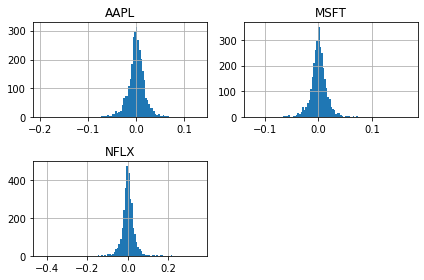

In [10]:
#Presenting the daily returns in a histogram for visualisation
log_ret.hist(bins = 100)
plt.tight_layout()

In [11]:
#A random number generator with a seed of 100 is used to generate weights, which are the allocations 
#of stock portfolios

np.random.seed(100)

portfolio = 10000           # 10000 random portfolios are generated with different random weights - a higher number 
                         # should be appointed, however for faster execution a smaller number is used 
all_weights = np.zeros((portfolio, len(price.columns) ))
ret_arr = np.zeros(portfolio)
vol_arr = np.zeros(portfolio)
sharp_arr = np.zeros(portfolio)

for x in range(portfolio):

    weights = np.array(np.random.random(len(price.columns))) 
    weights = weights / np.sum(weights)         #The weights have been normalized so that the total is equal to 1.
    all_weights[x, :] = weights
    
    exp_ret = np.sum((log_ret.mean() * weights) * 252) #expected returns for those respective weights
    ret_arr[x] = exp_ret
    
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))) 
    vol_arr[x] = exp_vol                              #Expected volatility for those respective weights
    
#The Sharpe Ratio is used as a metric to evaluate the lucrativeness of the portfolio.
#The Sharpe Ratio is the ratio of the expected returns to the expected volatility and quantifies the maximum 
#return an investor can expect for a given risk.
#The higher the Sharpe Ratio the better.
    
    SR = ret_arr[x] / vol_arr[x]
    sharp_arr[x] = SR    

In [12]:
#Finding the best combination of stocks which means the maximum value for the Sharpe ratio

sharp_arr.argmax()   #Argmax will return the index for the highest value of sharpe ratio  

max_vol = vol_arr[sharp_arr.argmax()]
max_ret = ret_arr[sharp_arr.argmax()]
best_weights = all_weights[sharp_arr.argmax(), :]

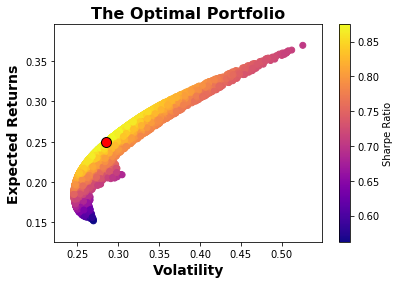

In [13]:
#plotting the Markowitz efficient frontier which will highlight the highest sharpe ratio allocation

plt.scatter(x = vol_arr, y = ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontsize = 14, weight = 'bold')
plt.ylabel('Expected Returns', fontsize = 14, weight = 'bold')
plt.title('The Optimal Portfolio', fontsize = 16, weight = 'bold')

#Finding the portfolio with the best sharpe ratio
plt.scatter(max_vol, max_ret, c = 'red', s = 100, edgecolors = 'black')

In [14]:
print('Final weight allocation \n')

for i in range(0, len(stocks)):
    print('The optimal allocation would be', round(best_weights[i] * 100,2), '% to', stocks[i])

Final weight allocation 

The optimal allocation would be 48.01 % to AAPL
The optimal allocation would be 19.5 % to MSFT
The optimal allocation would be 32.49 % to NFLX


Monte Carlo Simulation for a 1 year return

An initial amount of 100,000 is expected to be invested in the selected stocks in the best suited weights found. The Monte Carlo simulation will be used to generate an expected 1000 simulations of the expected amount at the end of 1 year or 252 working days. 

In [15]:
daily_ret = max_ret/252           #Daily stock returns are used
std_daily = max_vol/(np.sqrt(252))           #Daily volatility is used

In [16]:
sim = pd.DataFrame()         #An empty Dataframe to store the expected values 
iterations = 1000            #1000 simulations will be run to generate an expected amount after 1 year     

for x in range(iterations):
    t_intervals = 252               # The number of working days in a year
    a = 100000                        #Initial amount invested
    stream = []
    for i in range(t_intervals):
        end = round(a * (1 + np.random.normal(daily_ret,std_daily)))
        
        stream.append(end)
        
        a = end
        
    sim[x] = stream
    
sim

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,98784,102988,99419,101984,101716,99142,99533,98337,99481,99655,...,99684,101036,100471,102012,100781,98659,99460,101556,99143,99950
1,99640,104143,101421,104346,98238,99473,103355,98168,98175,102480,...,101782,99036,97458,99489,103085,95944,98784,103007,98095,100654
2,100136,104013,102650,107549,98581,98194,103664,98200,100560,102610,...,101557,101327,94670,98073,103066,97365,94385,102791,96660,100333
3,102892,104806,105451,107631,101193,97137,102805,98769,101207,104011,...,101783,97730,90915,101286,103394,97997,95022,102306,99033,99852
4,102394,103410,106596,106971,101977,97888,102328,98927,100974,103519,...,102775,99895,88971,100876,103829,97482,98239,100890,100063,98395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,160581,208523,125330,88805,160225,108106,101894,112654,82912,148153,...,129335,122308,178240,95661,84411,123162,116441,112200,99653,92804
248,158908,210827,125887,91842,160654,107576,104057,114741,84416,146088,...,135738,121965,182602,97042,85097,123269,115109,114663,101389,92955
249,159520,218223,124620,88797,160399,105607,103662,116968,84635,145462,...,135939,122751,184056,96997,83071,123478,113487,113747,104597,93025
250,160555,224073,124553,87988,158840,106624,103463,117110,83576,146855,...,135406,122539,181153,97201,82324,122758,115470,113531,103694,94224


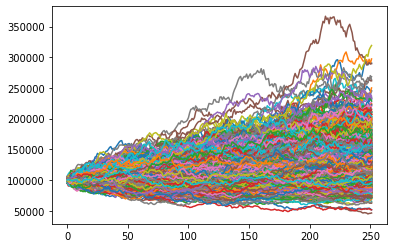

In [17]:
plt.plot(sim)
plt.show()   

In [18]:
print('Expected Amount at the end of 1 year: ', locale.currency(np.mean(sim.loc[251]),grouping = True))
print('Maximum Expected value: ',locale.currency(np.max(sim.loc[251]),grouping = True))
print('Minimum Expected value: ',locale.currency(np.min(sim.loc[251]),grouping = True))

Expected Amount at the end of 1 year:  $129,415.68
Maximum Expected value:  $319,174.00
Minimum Expected value:  $46,296.00
